In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

# Load regional data

In [2]:
#nomiregioni=['Abruzzo', 'Basilicata', 'P.A. Bolzano', 'Calabria', 'Campania',
   # 'Emilia Romagna', 'Friuli Venezia Giulia', 'Lazio', 'Liguria',
   #    'Lombardia', 'Marche', 'Molise', 'Piemonte', 'Puglia', 'Sardegna',
   #    'Sicilia', 'Toscana', 'P.A. Trento', 'Umbria', "Valle d'Aosta",
   #    'Veneto']

nomiregioni       = np.array(['Abruzzo','Basilicata','P.A. Bolzano','Calabria','Campania','Emilia-Romagna','Friuli Venezia Giulia','Lazio','Liguria','Lombardia','Marche','Molise','Piemonte','Puglia','Sardegna','Sicilia','Toscana','P.A. Trento','Umbria','Valle d\'Aosta','Veneto'])
len(nomiregioni)

21

In [3]:
datatot = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv')

datatot

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5,NaN,NaN,NaN
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2020-02-24T18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN
3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN
4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,0,10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,2020-04-26T17:00:00,ITA,9,Toscana,43.769231,11.255889,677,158,835,5234,6069,-77,132,2300,778,9147,127394,99751.0,NaN,NaN
1319,2020-04-26T17:00:00,ITA,4,P.A. Trento,46.068935,11.121231,199,24,223,1459,1682,-62,56,1807,405,3894,32142,19902.0,NaN,NaN
1320,2020-04-26T17:00:00,ITA,10,Umbria,43.106758,12.388247,91,17,108,188,296,-1,2,1008,64,1368,32569,22320.0,NaN,NaN
1321,2020-04-26T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,82,7,89,165,254,-59,6,721,131,1106,6135,4624.0,dc-IT-0012,dc-EN-0012


In [4]:
def dataregion(name):

    mask = datatot['denominazione_regione']==name
    data =datatot.loc[mask,:]
    xdata=pd.to_numeric(range(data.shape[0]))
    ydata=data['totale_casi']
    ydata_death=data['deceduti']
    ydata_rec=data['dimessi_guariti']

    #print(data.iloc[-1,:])

    yinfected=np.array(ydata-ydata_death-ydata_rec)
    
    return yinfected

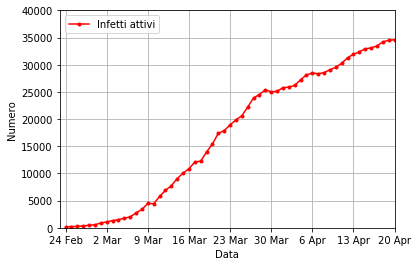

In [5]:
yinfected=dataregion('Lombardia')
xdata=np.arange(len(yinfected))

xgrid=np.arange(0,60,0.1)

#plt.figure(figsize=(9,7))
plt.plot(xdata,yinfected,label='Infetti attivi',marker='.',color='red')
#plt.plot(xdata,ydata_death,linestyle='None',label='Deaths',marker='s')
#plt.plot(xdata,ydata_rec,linestyle='None',label='Recovered',marker='s')
#plt.plot(xgrid,esponenziale(xgrid,-15,1.1),label='Exponential (10% more per day)',color='purple',linestyle='--')
#plt.plot(xgrid,lineare(xgrid,9,240),label='Linear',color='red',linestyle='--')
#plt.yscale('log')
plt.xlabel('Data')
plt.ylabel('Numero')
plt.xticks(np.arange(0,60,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr'])
plt.ylim(0,40000)
plt.xlim(-1,56)
plt.legend(loc=2)
plt.grid()
#plt.savefig('output/Data only_MOLISE_line.png',dpi=300)
plt.show()

## dati nazionali

In [6]:
data_naz = pd.read_csv('https://github.com/pcm-dpc/COVID-19/raw/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')
xdata=pd.to_numeric(range(data_naz.shape[0]))
ydata=data_naz['totale_casi']
ydata_death=data_naz['deceduti']
ydata_rec=data_naz['dimessi_guariti']

yinfected_naz=ydata-ydata_rec-ydata_death

print(data_naz.iloc[-1,0])

data_naz.head()

2020-04-26T17:00:00


,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324,NaN,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623,NaN,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,400,9587,NaN,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,650,12014,NaN,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,888,15695,NaN,NaN,NaN


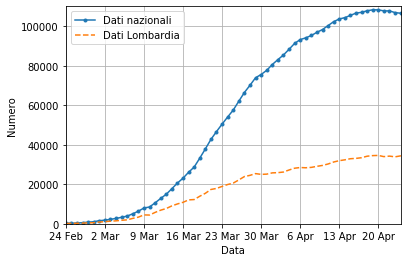

In [7]:
plt.plot(xdata,yinfected_naz,marker='.',label='Dati nazionali')
plt.plot(xdata,yinfected,'--',label='Dati Lombardia')
plt.xlabel('Data')
plt.ylabel('Numero')
plt.xticks(np.arange(0,60,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr'])
plt.ylim(0,110000)
plt.xlim(0,60)
plt.legend()
plt.grid()
plt.show()

### modello SIR per singola regione

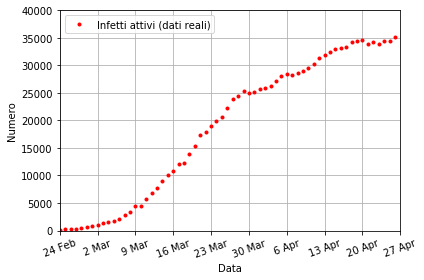

In [8]:
#fin_result=time_evo(10**7,0.41,26.,1/14,0,t_tresh=17,I0=0.4)
#t=fin_result[0]
#i_vec=fin_result[2]

plt.plot(xdata+17,yinfected,label='Infetti attivi (dati reali)',marker='.',color='red',linestyle='None')
#plt.plot(t,i_vec,label='SIR 2.0 fit',color='red')
plt.xlabel('Data')
plt.ylabel('Numero')
plt.xticks(np.arange(17,90,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr','4 Mag','11 Mag','18 Mag'],rotation=20)
plt.ylim(0,40000)
plt.xlim(17,80)
plt.legend(loc=2)
plt.grid()
plt.tight_layout()
plt.savefig('output/SIR_Lombardia.png',dpi=300)
plt.show()

In [9]:
#y_exp=yinfected
#y_th=i_vec[17:len(y_exp)+17]
#avg_err=round(np.mean(np.abs(y_exp-y_th)/y_exp)*100,1)

#print('average error',avg_err,'%')

## plot regionali

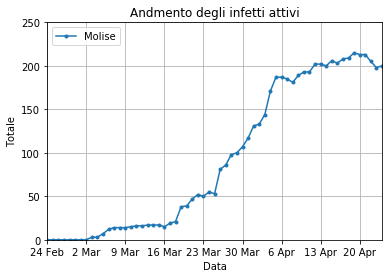

In [10]:
plt.plot(xdata,dataregion('Molise'),marker='.',label='Molise')
plt.xlabel('Data')
plt.ylabel('Totale')
plt.xticks(np.arange(0,60,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr'])
plt.ylim(0,250)
plt.xlim(0,60)
plt.title('Andmento degli infetti attivi')
plt.legend(loc=2)
plt.grid()
#plt.savefig('output/infettiattivi_regioni_parz.png',dpi=300)
plt.show()

In [17]:
nomiregioni       = np.array(['Abruzzo','Basilicata','P.A. Bolzano','Calabria','Campania','Emilia-Romagna',
                              'Friuli Venezia Giulia','Lazio','Liguria','Lombardia','Marche','Molise','Piemonte',
                              'Puglia','Sardegna','Sicilia','Toscana','P.A. Trento','Umbria','Valle d\'Aosta','Veneto'])



pop_regioni   =  np.array([1304970, 559084,533050, 1947131, 5801692, 4459477, 1215220, 5879082, 1550640, 10060574, 1525271, 305617, 4356406, 4029053, 1639591, 4999891, 3729641,541380, 882015, 125666, 4905854])


df_popregioni=pd.DataFrame(pop_regioni)
df_popregioni.index=nomiregioni
df_popregioni.columns=['Popolazione']

df_popregioni

,Popolazione
Abruzzo,1304970
Basilicata,559084
P.A. Bolzano,533050
Calabria,1947131
Campania,5801692
Emilia-Romagna,4459477
Friuli Venezia Giulia,1215220
Lazio,5879082
Liguria,1550640
Lombardia,10060574


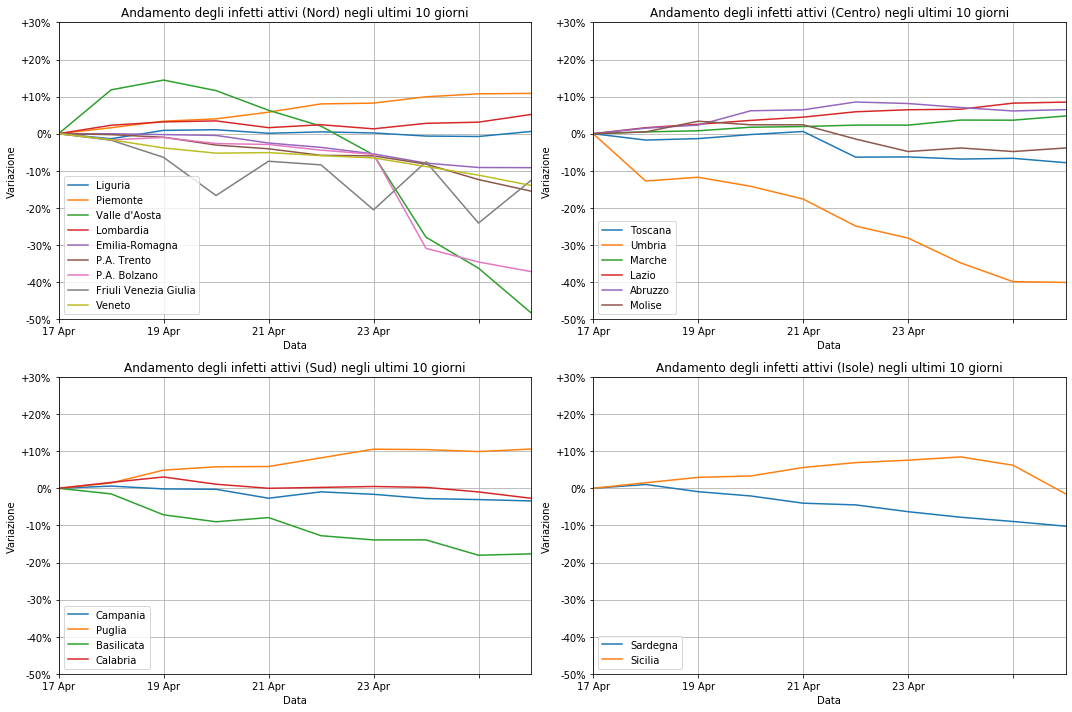

In [35]:
tpast=10

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.grid()
for reg in ['Liguria','Piemonte','Valle d\'Aosta','Lombardia','Emilia-Romagna','P.A. Trento','P.A. Bolzano','Friuli Venezia Giulia','Veneto']:
    ydata_inf=dataregion(reg)
    plt.plot(xdata,ydata_inf/ydata_inf[-tpast]*100,label=reg)
    plt.xlabel('Data')
    plt.ylabel('Variazione')
    plt.yticks(np.arange(50,131,10),['-50%','-40%','-30%','-20%','-10%','0%','+10%','+20%','+30%'])
    plt.xticks(np.arange(45,70,2),['9 Apr','11 Apr','13 Apr','15 Apr','17 Apr','19 Apr','21 Apr','23 Apr'])
    plt.ylim(50,130)
    plt.xlim(len(xdata)-tpast,len(xdata)-1)
    plt.title('Andamento degli infetti attivi (Nord) negli ultimi 10 giorni')
    plt.legend(loc=3)
plt.subplot(2,2,2)
plt.grid()
for reg in ['Toscana','Umbria','Marche','Lazio','Abruzzo','Molise']:
    ydata_inf=dataregion(reg)
    plt.plot(xdata,ydata_inf/ydata_inf[-tpast]*100,label=reg)
    plt.xlabel('Data')
    plt.ylabel('Variazione')
    plt.yticks(np.arange(50,131,10),['-50%','-40%','-30%','-20%','-10%','0%','+10%','+20%','+30%'])
    plt.xticks(np.arange(45,70,2),['9 Apr','11 Apr','13 Apr','15 Apr','17 Apr','19 Apr','21 Apr','23 Apr'])
    plt.ylim(50,130)
    plt.xlim(len(xdata)-tpast,len(xdata)-1)
    plt.title('Andamento degli infetti attivi (Centro) negli ultimi 10 giorni')
    plt.legend(loc=3)
plt.subplot(2,2,3)
plt.grid()
for reg in ['Campania','Puglia','Basilicata','Calabria']:
    ydata_inf=dataregion(reg)
    plt.plot(xdata,ydata_inf/ydata_inf[-tpast]*100,label=reg)
    plt.xlabel('Data')
    plt.ylabel('Variazione')
    plt.yticks(np.arange(50,131,10),['-50%','-40%','-30%','-20%','-10%','0%','+10%','+20%','+30%'])
    plt.xticks(np.arange(45,70,2),['9 Apr','11 Apr','13 Apr','15 Apr','17 Apr','19 Apr','21 Apr','23 Apr'])
    plt.ylim(50,130)
    plt.xlim(len(xdata)-tpast,len(xdata)-1)
    plt.title('Andamento degli infetti attivi (Sud) negli ultimi 10 giorni')
    plt.legend(loc=3)
plt.subplot(2,2,4)
plt.grid()
for reg in ['Sardegna','Sicilia']:
    ydata_inf=dataregion(reg)
    plt.plot(xdata,ydata_inf/ydata_inf[-tpast]*100,label=reg)
    plt.xlabel('Data')
    plt.ylabel('Variazione')
    plt.yticks(np.arange(50,131,10),['-50%','-40%','-30%','-20%','-10%','0%','+10%','+20%','+30%'])
    plt.xticks(np.arange(45,70,2),['9 Apr','11 Apr','13 Apr','15 Apr','17 Apr','19 Apr','21 Apr','23 Apr'])
    plt.ylim(50,130)
    plt.xlim(len(xdata)-tpast,len(xdata)-1)
    plt.title('Andamento degli infetti attivi (Isole) negli ultimi 10 giorni')
    plt.legend(loc=3)
plt.tight_layout()
plt.savefig('output/infettiattivi_regioni.png',dpi=300)
plt.show()

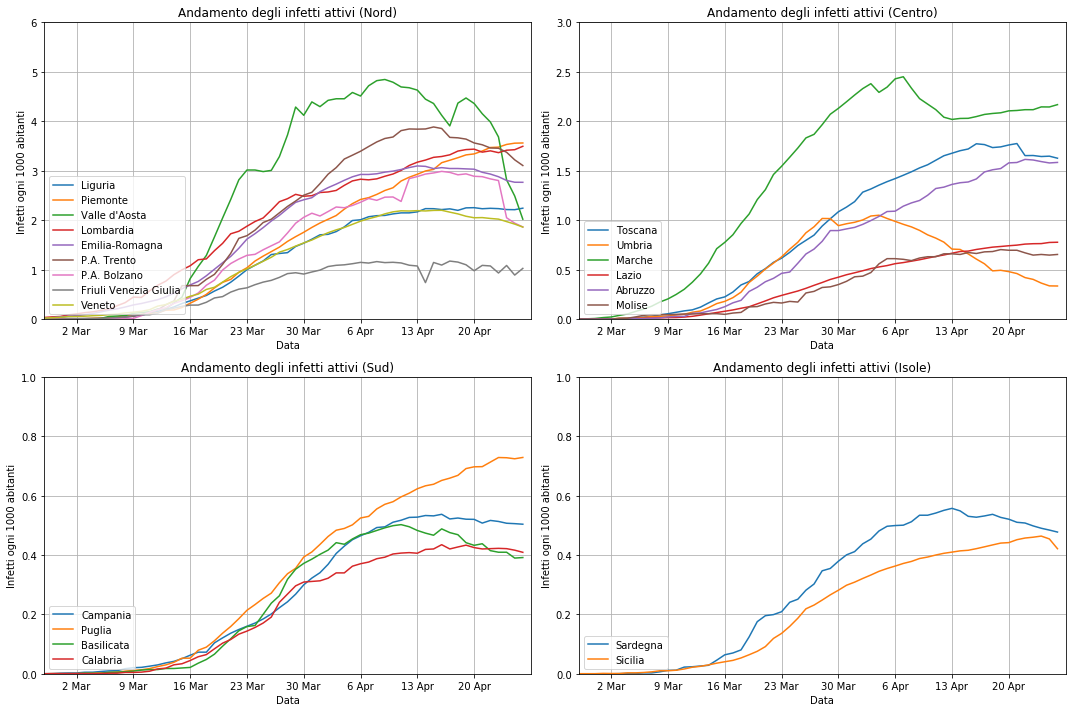

In [38]:
tpast=60

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.grid()
for reg in ['Liguria','Piemonte','Valle d\'Aosta','Lombardia','Emilia-Romagna','P.A. Trento','P.A. Bolzano','Friuli Venezia Giulia','Veneto']:
    ydata_inf=dataregion(reg)
    plt.plot(xdata,ydata_inf/df_popregioni.loc[reg,'Popolazione']*1000,label=reg)
    plt.xlabel('Data')
    plt.ylabel('Infetti ogni 1000 abitanti')
    plt.xticks(np.arange(0,60,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr'])
    plt.ylim(0,6)
    plt.xlim(len(xdata)-tpast,len(xdata))
    plt.title('Andamento degli infetti attivi (Nord)')
    plt.legend(loc=3)
plt.subplot(2,2,2)
plt.grid()
for reg in ['Toscana','Umbria','Marche','Lazio','Abruzzo','Molise']:
    ydata_inf=dataregion(reg)
    plt.plot(xdata,ydata_inf/df_popregioni.loc[reg,'Popolazione']*1000,label=reg)
    plt.xlabel('Data')
    plt.ylabel('Infetti ogni 1000 abitanti')
    #plt.yticks(np.arange(50,131,10),['-50%','-40%','-30%','-20%','-10%','0%','+10%','+20%','+30%'])
    plt.xticks(np.arange(0,60,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr'])
    plt.ylim(0,3)
    plt.xlim(len(xdata)-tpast,len(xdata))
    plt.title('Andamento degli infetti attivi (Centro)')
    plt.legend(loc=3)
plt.subplot(2,2,3)
plt.grid()
for reg in ['Campania','Puglia','Basilicata','Calabria']:
    ydata_inf=dataregion(reg)
    plt.plot(xdata,ydata_inf/df_popregioni.loc[reg,'Popolazione']*1000,label=reg)
    plt.xlabel('Data')
    plt.ylabel('Infetti ogni 1000 abitanti')
    #plt.yticks(np.arange(50,131,10),['-50%','-40%','-30%','-20%','-10%','0%','+10%','+20%','+30%'])
    plt.xticks(np.arange(0,60,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr'])
    plt.ylim(0,1)
    plt.xlim(len(xdata)-tpast,len(xdata))
    plt.title('Andamento degli infetti attivi (Sud)')
    plt.legend(loc=3)
plt.subplot(2,2,4)
plt.grid()
for reg in ['Sardegna','Sicilia']:
    ydata_inf=dataregion(reg)
    plt.plot(xdata,ydata_inf/df_popregioni.loc[reg,'Popolazione']*1000,label=reg)
    plt.xlabel('Data')
    plt.ylabel('Infetti ogni 1000 abitanti')
    #plt.yticks(np.arange(50,131,10),['-50%','-40%','-30%','-20%','-10%','0%','+10%','+20%','+30%'])
    plt.xticks(np.arange(0,60,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr'])
    plt.ylim(0,1)
    plt.xlim(len(xdata)-tpast,len(xdata))
    plt.title('Andamento degli infetti attivi (Isole)')
    plt.legend(loc=3)
plt.tight_layout()
plt.savefig('output/infettiattivi_regioni_normalizzati.png',dpi=300)
plt.show()